# Bilateral Filter using cv2 & skimage

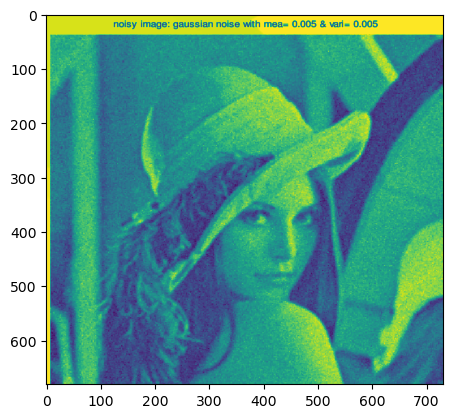

In [3]:
import cv2
import matplotlib.pyplot as plt

img_gaussian_noise=cv2.imread("Noisy-image-Gaussian-noise.png",0)
img_sait_pepper_noise=cv2.imread("Noisy-images-salt-and-pepper-noise.png",0)

img=img_gaussian_noise

bilateral_using_cv2=cv2.bilateralFilter(img,5,20,100,borderType=cv2.BORDER_CONSTANT)

from skimage.restoration import denoise_bilateral
bilateral_using_skimage=denoise_bilateral(img,sigma_color=0.05,sigma_spatial=13,channel_axis=None)

plt.imshow(bilateral_using_cv2)

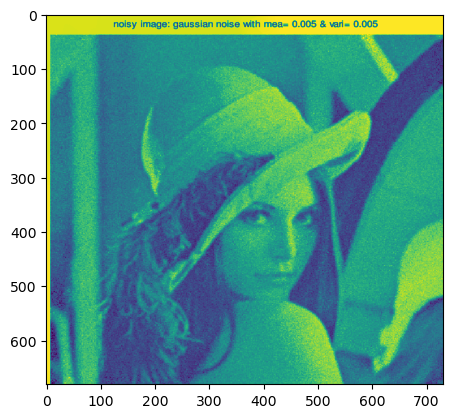

In [4]:
plt.imshow(bilateral_using_skimage)


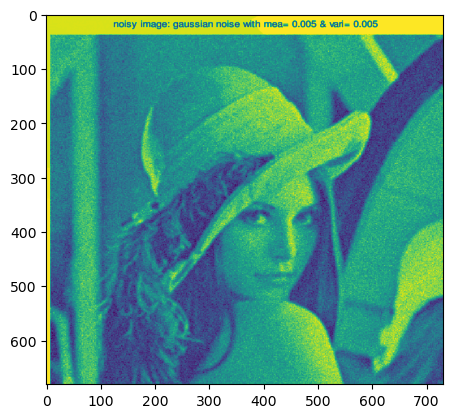

In [5]:
plt.imshow(img)

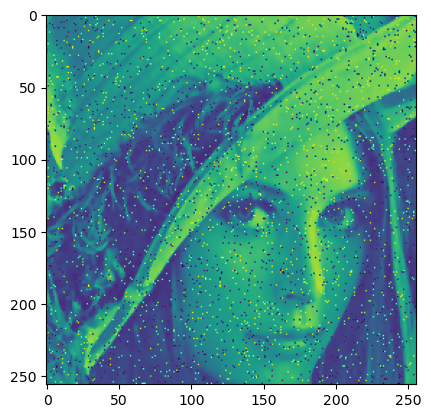

In [6]:
img=img_sait_pepper_noise

bilateral_using_cv2=cv2.bilateralFilter(img,5,20,100,borderType=cv2.BORDER_CONSTANT)

from skimage.restoration import denoise_bilateral
bilateral_using_skimage=denoise_bilateral(img,sigma_color=0.05,sigma_spatial=13,channel_axis=None)

plt.imshow(bilateral_using_cv2)

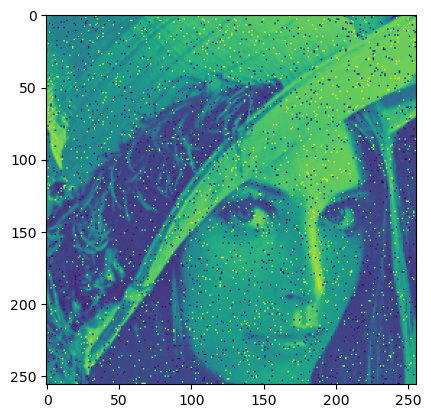

In [7]:
plt.imshow(bilateral_using_skimage)

# Denoising using NLM (Non Local Mean) Filtering

In [14]:
import numpy as np
from skimage import io,img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

img_gaussian_noise=img_as_float(io.imread("Noisy-image-Gaussian-noise.png",as_gray=True))
img_salt_pepper_noise=img_as_float(io.imread("Noisy-images-salt-and-pepper-noise.png",as_gray=True))

img=img_gaussian_noise
sigma_est=np.mean(estimate_sigma(img,channel_axis=True))

denoise_img=denoise_nl_means(img,h=1.15*sigma_est,fast_mode=True,patch_size=5,patch_distance=3,channel_axis=None)

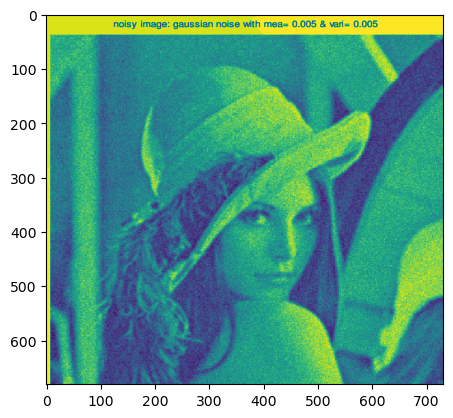

In [15]:
plt.imshow(img)

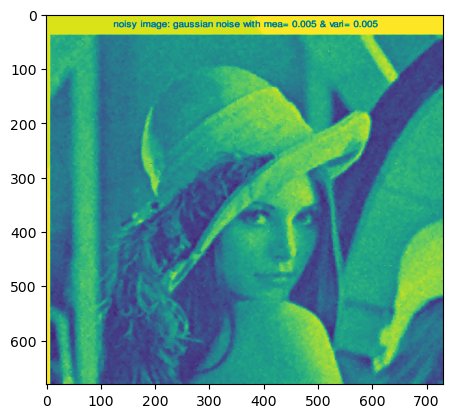

In [16]:
plt.imshow(denoise_img)

In [17]:
img=img_salt_pepper_noise
sigma_est=np.mean(estimate_sigma(img,channel_axis=True))

denoise_img=denoise_nl_means(img,h=1.15*sigma_est,fast_mode=True,patch_size=5,patch_distance=3,channel_axis=None)

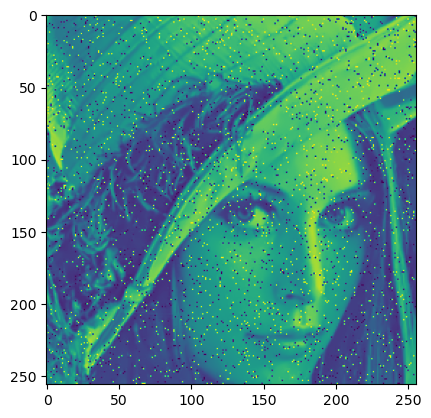

In [18]:
plt.imshow(denoise_img)

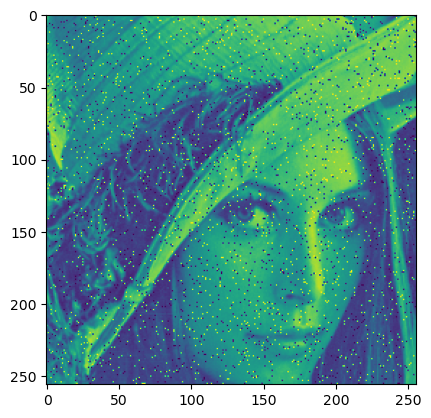

In [19]:
plt.imshow(img)

# Denoising Works using Total Variance filtering

C:\Users\USER\AppData\Local\Temp\ipykernel_5956\3321745899.py:7: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
        4.7000e+01, 6.1000e+01, 1.2100e+02, 2.7400e+02, 7.3200e+02,
        1.5860e+03, 2.8460e+03, 5.1430e+03, 7.1950e+03, 8.6670e+03,
        9.6280e+03, 8.4850e+03, 7.7910e+03, 6.7870e+03, 6.0470e+03,
        5.3610e+03, 5.0180e+03, 4.5020e+03, 4.3290e+03, 4.4420e+03,
        4.5990e+03, 4.5210e+03, 4.8580e+03, 4.8000e+03, 4.9100e+03,
        5.4950e+03, 5.9530e+03, 6.9850e+03, 7.9740e+03, 8.7000e+03,
        9.0540e+03, 8.3230e+03, 7.4230e+03, 6.9900e+03, 6.8830e+03,
        6.6090e+03, 6.8850e+03, 7.8200e+03, 8.7320e+03, 9.7490e+03,
        1.0032e+04, 1.0445e+04, 1.0228e+04, 9.3850e+03, 9.3590e+03,
        1.0224e+04, 1.0960e+04, 1.0939e+04, 1.0871e+04, 1.1202e+04,
        1.1023e+04, 1.0450e+04, 9.7490e+03, 8.5840e+03, 7.5850e+03,
        6.8640e+03, 6.1080e+03, 5.4780e+03, 5.3300e+03, 5.2170e+03,
        5.0440e+03, 4.0130e+03, 3.6730e+03, 3.51

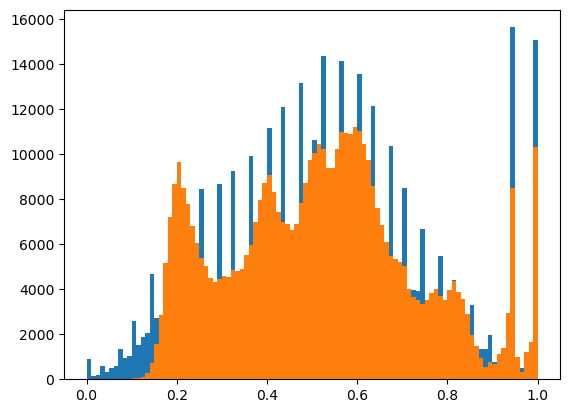

In [34]:
from skimage.restoration import denoise_tv_chambolle

img = img_as_float(io.imread('Noisy-image-Gaussian-noise.png', as_gray=True))


plt.hist(img.flat, bins=100, range=(0,1))
denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=False)
plt.hist(denoise_img.flat, bins=100, range=(0,1))


# cv2.imshow("Original", img)
# cv2.imshow("TV Filtered", denoise_img)
# cv2.waitKey(0)          
# cv2.destroyAllWindows()

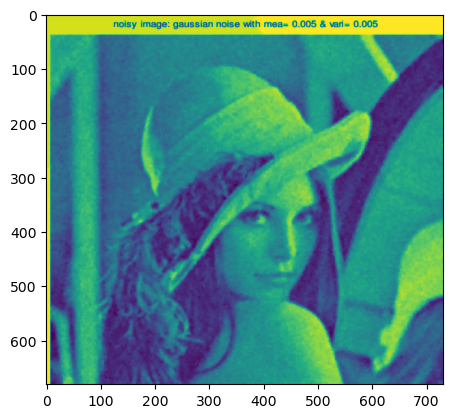

In [35]:
plt.imshow(denoise_img)

# Denoising 

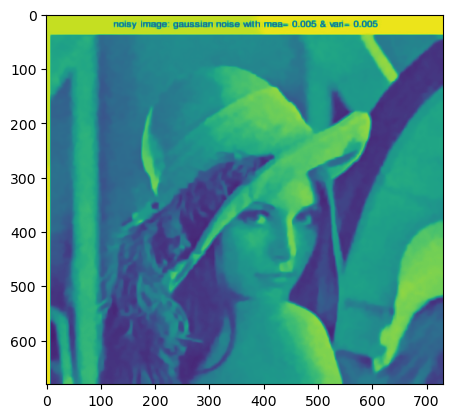

In [30]:
import bm3d

noisy_img = img_as_float(io.imread("Noisy-image-Gaussian-noise.png", as_gray=True))

BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

plt.imshow(BM3D_denoised_image)

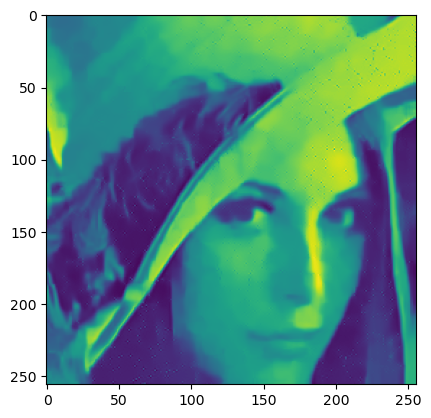

In [31]:
noisy_img = img_as_float(io.imread("Noisy-images-salt-and-pepper-noise.png", as_gray=True))

BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

plt.imshow(BM3D_denoised_image)

# Edge detection Filter


In [36]:
from skimage import io, filters, feature
from skimage.color import rgb2gray

img = cv2.imread('Bird.jpg', 0)

from skimage.filters import roberts, sobel, scharr, prewitt, farid

roberts_img = roberts(img)
sobel_img = sobel(img)
scharr_img = scharr(img)
prewitt_img = prewitt(img)
farid_img = farid(img)

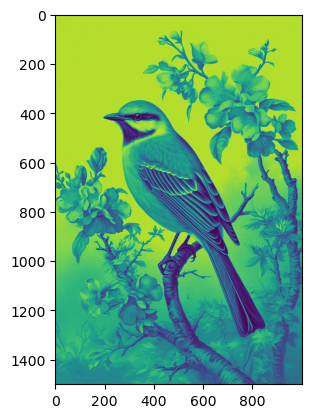

In [37]:
plt.imshow(img)

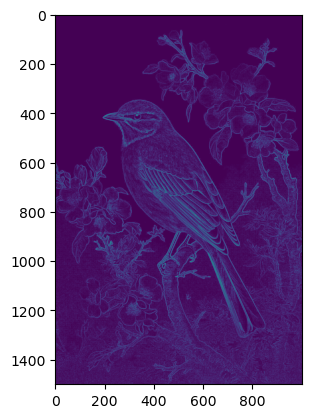

In [38]:
plt.imshow(roberts_img)

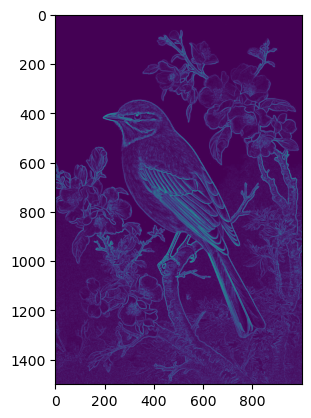

In [39]:
plt.imshow(sobel_img)

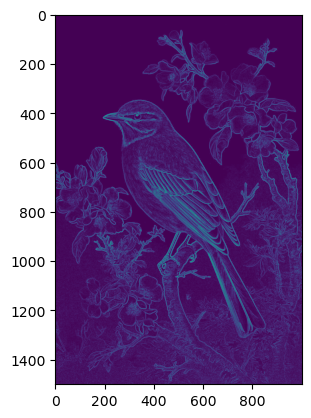

In [40]:
plt.imshow(scharr_img)

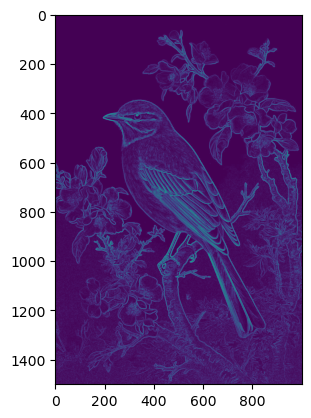

In [41]:
plt.imshow(prewitt_img)

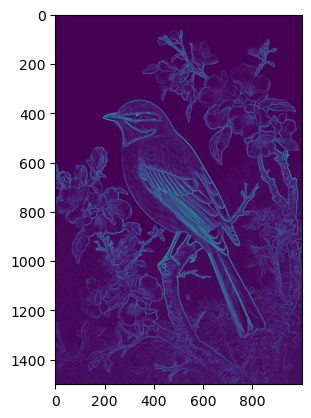

In [42]:
plt.imshow(farid_img)

# Canny edge detection filter

In [44]:
canny_edge = cv2.Canny(img, 50, 80)

sigma = 0.3
median = np.median(img)


lower = int(max(0, (1.0 - sigma) * median)) 

upper = int(min(255, (1.0 + sigma) * median)) 

auto_canny = cv2.Canny(img, lower, upper)

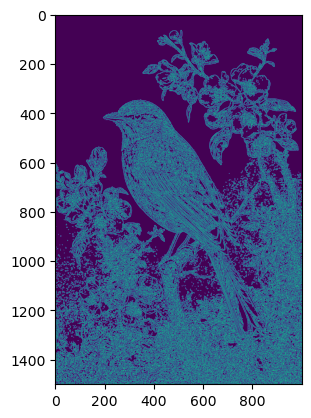

In [45]:
plt.imshow(canny_edge)

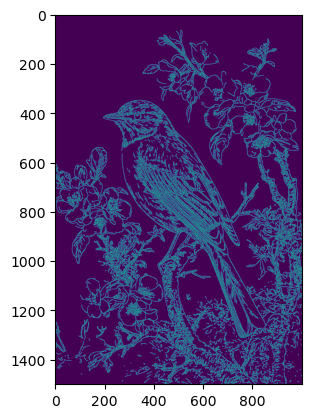

In [46]:
plt.imshow(auto_canny)